Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/1hqvHxRxWwhTwDOqbRT76iFop9S11A1BP

In [1]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)

import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

from keras import utils

Using TensorFlow backend.


# 載入CIFAR10資料集

In [2]:
# 載入CIFAR10資料集
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


shape of x_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of x_test (10000, 32, 32, 3)
shape of y_test (10000, 1)
以下顯示10張訓練用圖


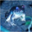

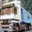

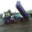

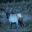

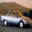

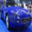

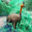

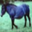

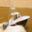

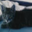

以下顯示10張驗證用圖


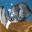

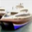

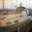

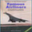

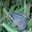

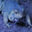

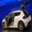

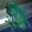

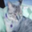

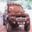

In [3]:
# CIFAR10資料
# 訓練資料集合：50000張32*32大小的圖片，3代表3 channel(BGR)
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
# 標籤資料集合:有50000張圖片，各自對應一個標籤
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

print('以下顯示10張訓練用圖')
# 以下顯示10張訓練用圖
for i in range(10):
  cv2_imshow(x_train[i])

print('以下顯示10張驗證用圖')
# 以下顯示10張訓練用圖
for i in range(10):
  cv2_imshow(x_test[i])

# 開始對圖片資料處理

In [0]:
# 針對所有的x_trian& x_test進行min-max normalization
x_train_minmaxnorm=x_train.astype('float')/255
x_test_minmaxnorm=x_test.astype('float')/255

In [0]:
# 將標籤轉成one-hot vector
# e.g., 6轉成[0,0,0,0,0,1,0,0,0,0]
y_train_onehotvector=utils.to_categorical(y_train,10)
y_test_onehotvetor=utils.to_categorical(y_test,10)

# 開始建構卷積網路架構

In [70]:
# 建置網路各層
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten,BatchNormalization

cifar_classifier=Sequential()
# 輸入為32*32*3
# Layer: 卷積層+Max池化層
cifar_classifier.add(Convolution2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
cifar_classifier.add(BatchNormalization())
cifar_classifier.add(MaxPooling2D(pool_size=(2,2)))

# Layer: 卷積層+Max池化層
cifar_classifier.add(Convolution2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
cifar_classifier.add(BatchNormalization())
cifar_classifier.add(MaxPooling2D(pool_size=(2,2)))

# Layer: 卷積層+Max池化層
cifar_classifier.add(Convolution2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
cifar_classifier.add(BatchNormalization())

# Layer: 展平層
cifar_classifier.add(Flatten())
cifar_classifier.add(BatchNormalization())

# Layer: 密集層1(relu)
cifar_classifier.add(Dense(1024,activation='relu'))
cifar_classifier.add(BatchNormalization())

# Layer: 密集層2(softmax，輸出)
cifar_classifier.add(Dense(10,activation='softmax'))

cifar_classifier.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_74 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
batch_normalization_75 (Batc (None, 16, 16, 256)       1024      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 256)       

In [0]:
# 設定網路訓練配置
# 最佳化: adam
# 損失函式：categorical_crossentropy
# 評量：acc(正確率)
cifar_classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# 進行訓練

In [72]:
# 進行訓練
history=cifar_classifier.fit(x=x_train_minmaxnorm,y=y_train_onehotvector,batch_size=256,epochs=40,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/40
45000/45000 [==============================] - 33s 731us/step - loss: 1.3602 - acc: 0.5573 - val_loss: 4.9578 - val_acc: 0.1298
Epoch 2/40
45000/45000 [==============================] - 29s 655us/step - loss: 0.8029 - acc: 0.7216 - val_loss: 6.0098 - val_acc: 0.2026
Epoch 3/40
45000/45000 [==============================] - 29s 653us/step - loss: 0.5829 - acc: 0.7974 - val_loss: 2.0129 - val_acc: 0.4714
Epoch 4/40
45000/45000 [==============================] - 29s 655us/step - loss: 0.3844 - acc: 0.8665 - val_loss: 1.0031 - val_acc: 0.6824
Epoch 5/40
45000/45000 [==============================] - 29s 654us/step - loss: 0.2272 - acc: 0.9217 - val_loss: 1.0393 - val_acc: 0.6970
Epoch 6/40
45000/45000 [==============================] - 29s 653us/step - loss: 0.1367 - acc: 0.9544 - val_loss: 0.9644 - val_acc: 0.7350
Epoch 7/40
45000/45000 [==============================] - 29s 655us/step - loss: 0.0908 - acc: 0.9700 - val_loss: 1.0

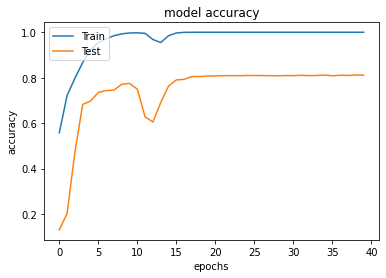

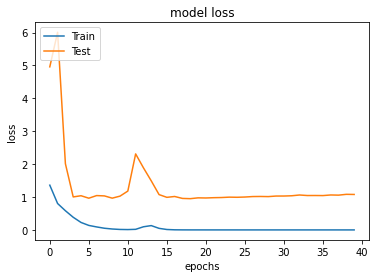

In [73]:
# 繪製訓練得出的loss & accuracy
import matplotlib.pyplot as plot

plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epochs')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epochs')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
# 儲存模型
cifar_classifier.save('cifar10_iter40_valacc_81.h5')